## Data Handling

In [1]:
# Data Handling & Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Evaluation Metrics
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, accuracy_score, 
    classification_report, roc_curve, auc
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import shap
import multiprocessing

# Interactive Widgets
import ipywidgets as widgets
from IPython.display import display

# GPU Check
import torch

print("GPU Available:", torch.cuda.is_available())  
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU Found")

GPU Available: True
GPU Name: NVIDIA GeForce RTX 3050 Ti Laptop GPU


## Data Preprocessing

In [2]:
df = pd.read_csv('stroke_risk_dataset.csv')

In [3]:
# Look at first 5 rows
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


In [4]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

In [5]:
# Convert Inf values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Exploratory Analysis 

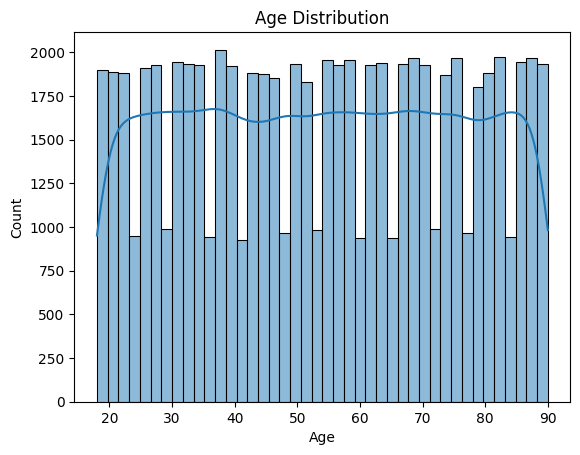

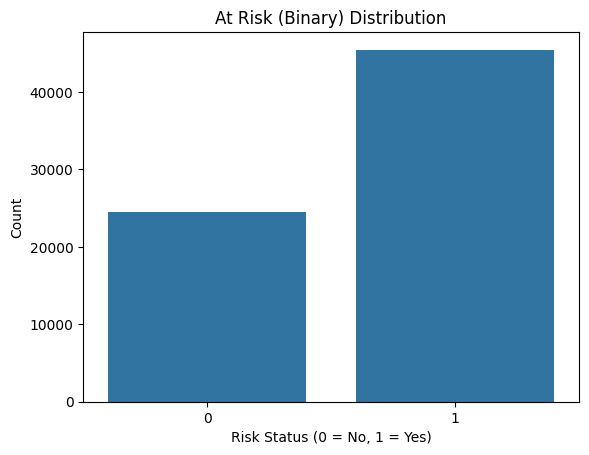

In [6]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.countplot(x=df['At Risk (Binary)'])
plt.title('At Risk (Binary) Distribution')
plt.xlabel('Risk Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

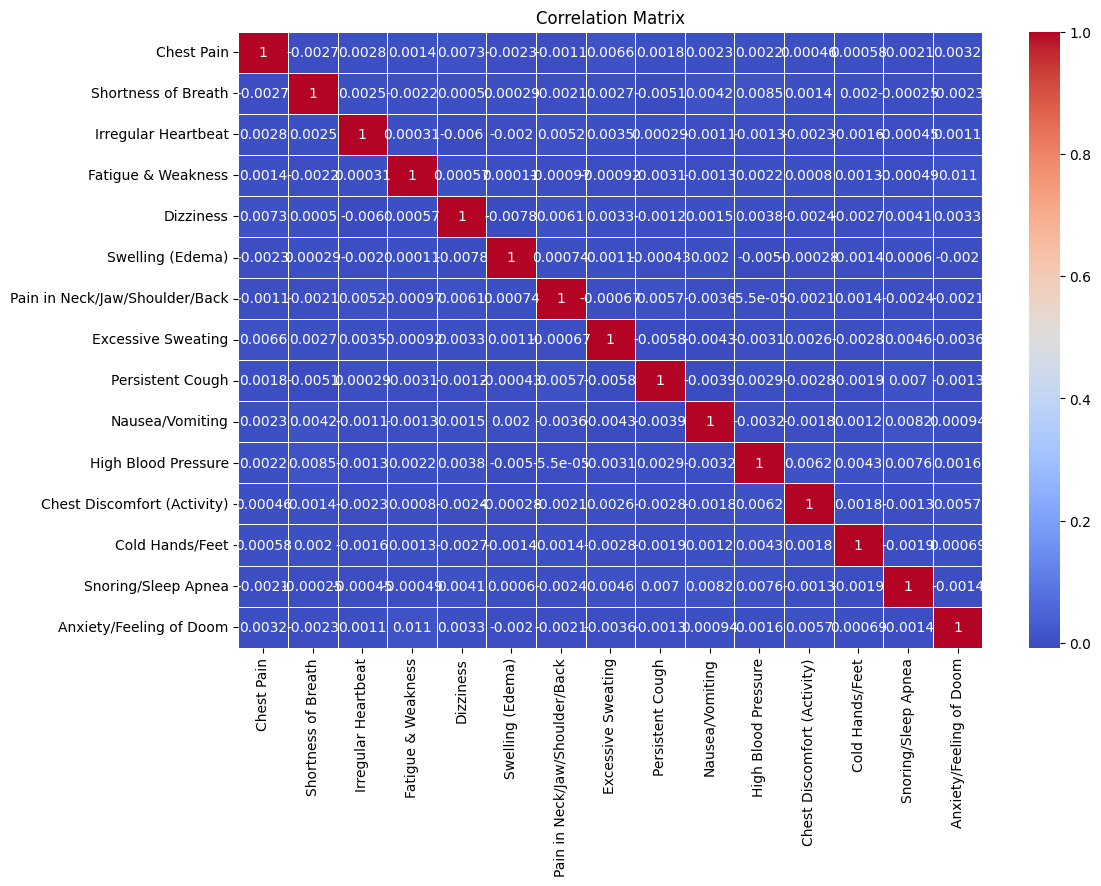

In [7]:
excluded_columns = ['Age', 'At Risk (Binary)', 'Stroke Risk (%)']
df_filtered = df.drop(columns=excluded_columns, errors='ignore')

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

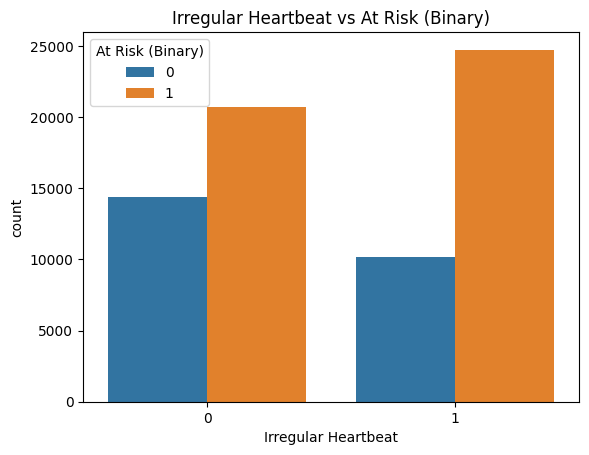

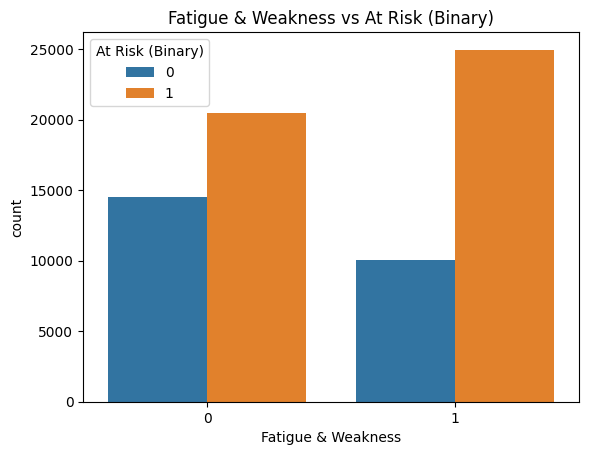

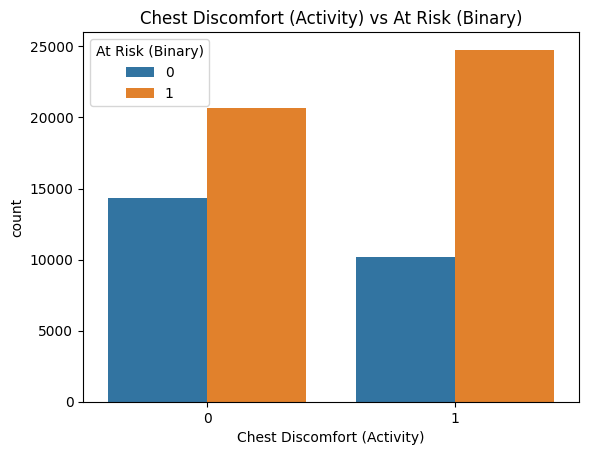

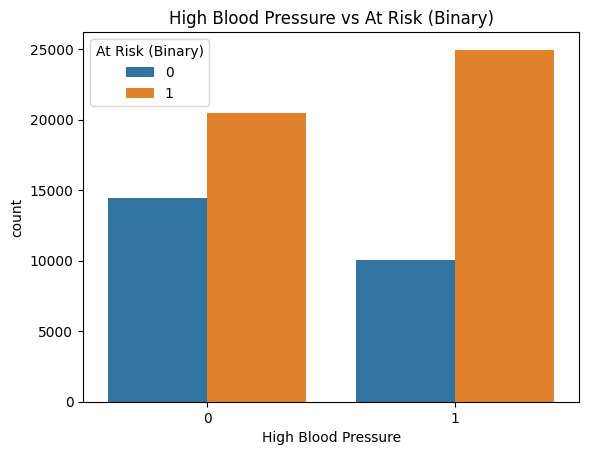

In [8]:
cols = ['Irregular Heartbeat', 'Fatigue & Weakness', 'Chest Discomfort (Activity)', 'High Blood Pressure']

for col in cols:
    sns.countplot(x=col, hue='At Risk (Binary)', data=df)
    plt.title(f'{col} vs At Risk (Binary)')
    plt.show()

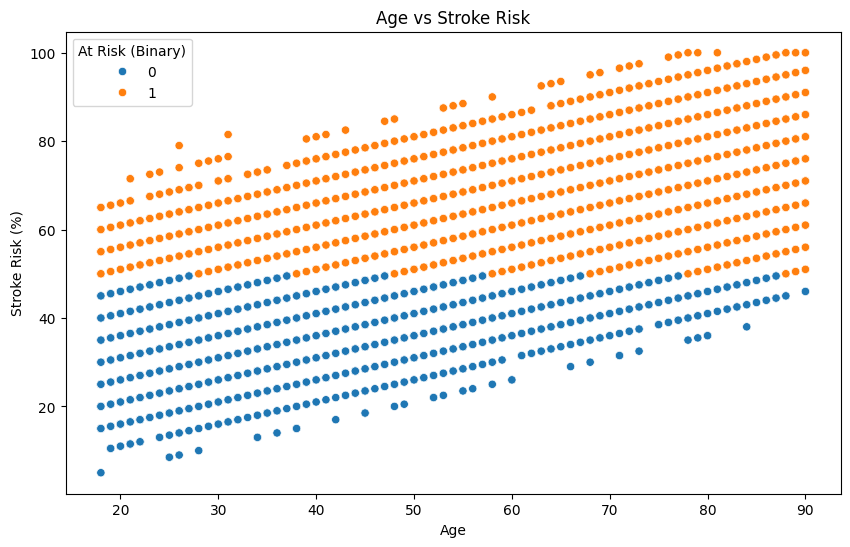

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Stroke Risk (%)', hue='At Risk (Binary)', data=df)
plt.title('Age vs Stroke Risk')
plt.show()

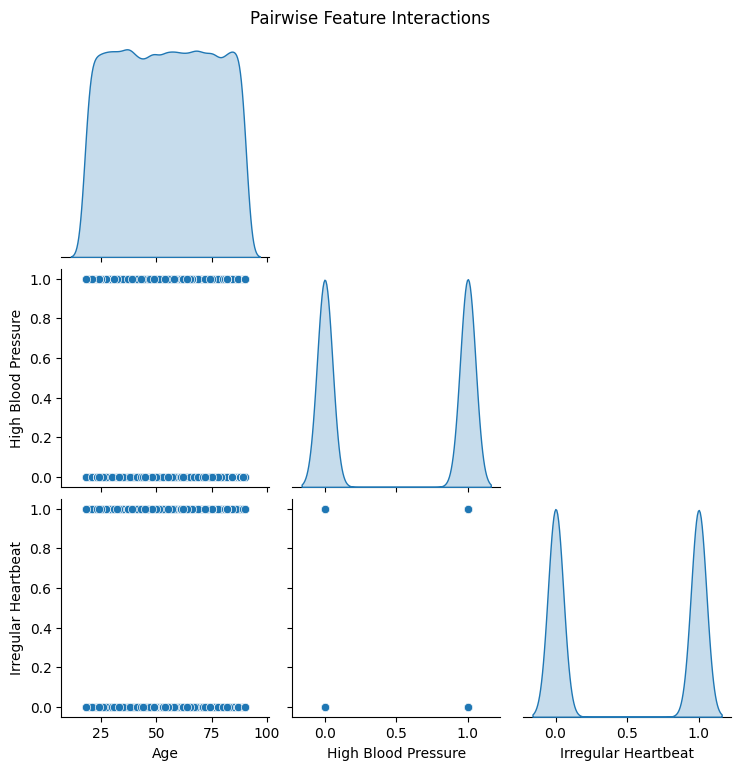

In [10]:
# Pairplot to visualize interactions between multiple features
interaction_cols = ['Age', 'High Blood Pressure', 'Irregular Heartbeat']
sns.pairplot(df[interaction_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Feature Interactions", y=1.02)
plt.show()

## Feature Engineering

In [11]:
# Rename Columns
df.rename(columns={
    "Chest Pain": "chest_pain",
    "Shortness of Breath": "shortness_of_breath",
    "Irregular Heartbeat": "irregular_heartbeat",
    "Dizziness": "dizziness",
    "High Blood Pressure": "high_blood_pressure",
    "Stroke Risk (%)": "stroke_risk_percent",
    "At Risk (Binary)": "at_risk_binary"
}, inplace=True)

In [12]:
#Feature Engineering
df['bp_heartbeat_interaction'] = df['high_blood_pressure'] * df['irregular_heartbeat']


In [13]:
# Feature & Target Selection
X = df.drop(columns=["at_risk_binary", "stroke_risk_percent"])
y_reg = df["stroke_risk_percent"] 
y_cls = df["at_risk_binary"] 

In [14]:
# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

In [15]:
# Standardizing numerical features
scaler = StandardScaler()

X_train_reg["Age"] = scaler.fit_transform(X_train_reg[["Age"]])
X_test_reg["Age"] = scaler.transform(X_test_reg[["Age"]])

X_train_cls["Age"] = scaler.transform(X_train_cls[["Age"]])
X_test_cls["Age"] = scaler.transform(X_test_cls[["Age"]])

In [16]:
# Save the modified DataFrame to a CSV file
df.to_csv("modified_stroke_risk_dataset.csv", index=False)

## Baseline Model Implementation

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define function for model evaluation
def model_performance(y_true, y_pred, model_name):
    # Calculate the evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5  # Square root of MSE
    r2 = r2_score(y_true, y_pred)  # R-squared

    # Print the evaluation results
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-" * 50)

In [18]:
import xgboost as xgb
import cupy as cp  # Import cupy to work with GPU arrays

# Assuming you have your features (X_train_reg, X_test_reg) and targets (y_train_reg, y_test_reg)

# Move the data to the GPU using cupy
X_train_reg_gpu = cp.asarray(X_train_reg)  # Move training features to GPU
X_test_reg_gpu = cp.asarray(X_test_reg)    # Move test features to GPU
y_train_reg_gpu = cp.asarray(y_train_reg)  # Move training targets to GPU
y_test_reg_gpu = cp.asarray(y_test_reg)    # Move test targets to GPU

# Initialize the XGBoost Regressor model
xgb_reg = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    tree_method='hist',
    device='cuda'
)


# Train the model using GPU data
xgb_reg.fit(X_train_reg_gpu, y_train_reg_gpu)  # Model training on GPU

# Use predict() for prediction on GPU
y_pred_xgb_reg = xgb_reg.predict(X_test_reg_gpu)  # Prediction on GPU

# Evaluate the model
model_performance(y_test_reg, y_pred_xgb_reg, "XGBoost Regressor")


XGBoost Regressor Performance:
Mean Absolute Error (MAE): 1.5792
Root Mean Squared Error (RMSE): 1.9920
R-squared (R²): 0.9803
--------------------------------------------------


In [19]:
# Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated MAE and RMSE
mae_scores = -cross_val_score(xgb_reg, X_train_reg, y_train_reg, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = -cross_val_score(xgb_reg, X_train_reg, y_train_reg, cv=kf, scoring='neg_root_mean_squared_error')

print("\n📊 Cross-Validation Results (5-Fold):")
print(f"1. Average MAE: {mae_scores.mean():.4f}")
print(f"2. Average RMSE: {rmse_scores.mean():.4f}")

# R² via cross_val_predict
y_cv_pred = cross_val_predict(xgb_reg, X_train_reg, y_train_reg, cv=kf)
r2 = r2_score(y_train_reg, y_cv_pred)
print(f"3. Cross-Validated R²: {r2:.4f}")

c:\Books\UNI\YEAR 3 SEM 2\FYP\Text\text-env\Lib\site-packages\xgboost\core.py:729: UserWarning: [20:37:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)



📊 Cross-Validation Results (5-Fold):
1. Average MAE: 1.6073
2. Average RMSE: 2.0160
3. Cross-Validated R²: 0.9802


In [20]:
# Train and save the model 
import joblib

# Select the column(s) you want to scale
scaler = StandardScaler()
df["Age"] = scaler.fit_transform(df[["Age"]])  # Fit + transform

# ✅ Save the scaler to disk
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [21]:
# Train and save the model 
import joblib

# Save the trained model
joblib.dump(xgb_reg, 'symptom_model.pkl')

['symptom_model.pkl']

In [22]:
#Feature Importanmce 

# Get the trained booster
booster = xgb_reg.get_booster()

# Get raw feature importances from booster (e.g., 'gain', 'weight', 'cover')
raw_importance = booster.get_score(importance_type='gain')

# Map 'f0', 'f1', ... to actual column names from the original pandas DataFrame
column_names = X_train_reg.columns.tolist()  # X_train_reg is your original DataFrame
mapped_importance = {
    column_names[int(k[1:])]: v for k, v in raw_importance.items()
}

# Convert to a DataFrame for easy viewing
import pandas as pd
importance_df = pd.DataFrame(mapped_importance.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print the feature importances
print(importance_df)

                           Feature     Importance
0                              Age  195694.906250
1         bp_heartbeat_interaction   57457.679688
2                       chest_pain   43378.636719
3              shortness_of_breath   39058.875000
4              Snoring/Sleep Apnea   38901.535156
5                        dizziness   38727.757812
6               Fatigue & Weakness   38571.527344
7                  Cold Hands/Feet   37009.300781
8          Anxiety/Feeling of Doom   35956.339844
9      Chest Discomfort (Activity)   35545.515625
10                 Nausea/Vomiting   34787.707031
11  Pain in Neck/Jaw/Shoulder/Back   34734.203125
12                Persistent Cough   33709.378906
13                Swelling (Edema)   33637.386719
14              Excessive Sweating   33428.042969
15             high_blood_pressure   26638.484375
16             irregular_heartbeat   25699.269531


## Model Evaluation

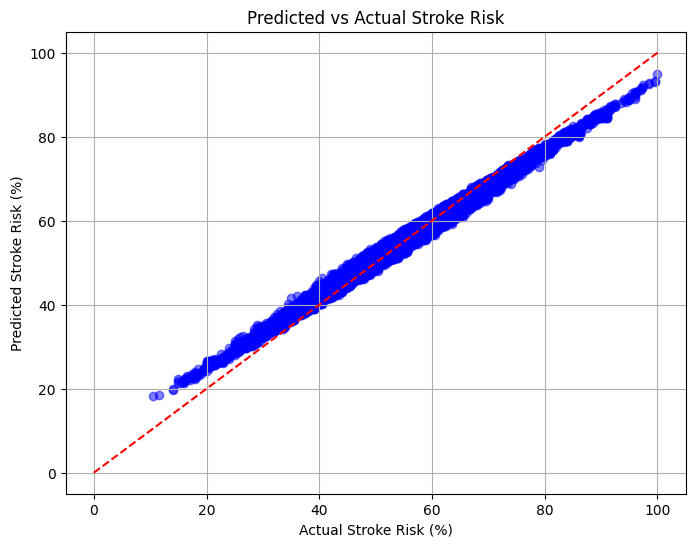

In [23]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_xgb_reg, alpha=0.5, color='blue')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Ideal prediction line
plt.xlabel("Actual Stroke Risk (%)")
plt.ylabel("Predicted Stroke Risk (%)")
plt.title("Predicted vs Actual Stroke Risk")
plt.grid(True)

plt.show()

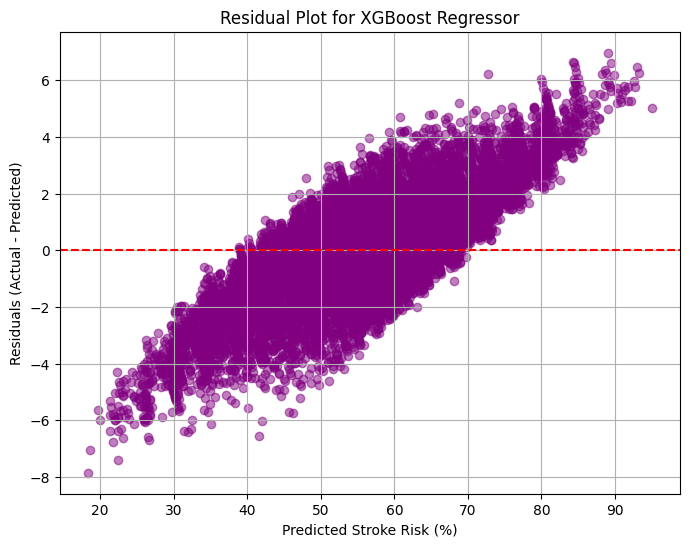

In [24]:
import numpy as np

# Calculate residuals
residuals = y_test_reg - y_pred_xgb_reg

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb_reg, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  # Zero-error baseline
plt.xlabel("Predicted Stroke Risk (%)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for XGBoost Regressor")
plt.grid(True)
plt.show()

## Explainability & Interpretability

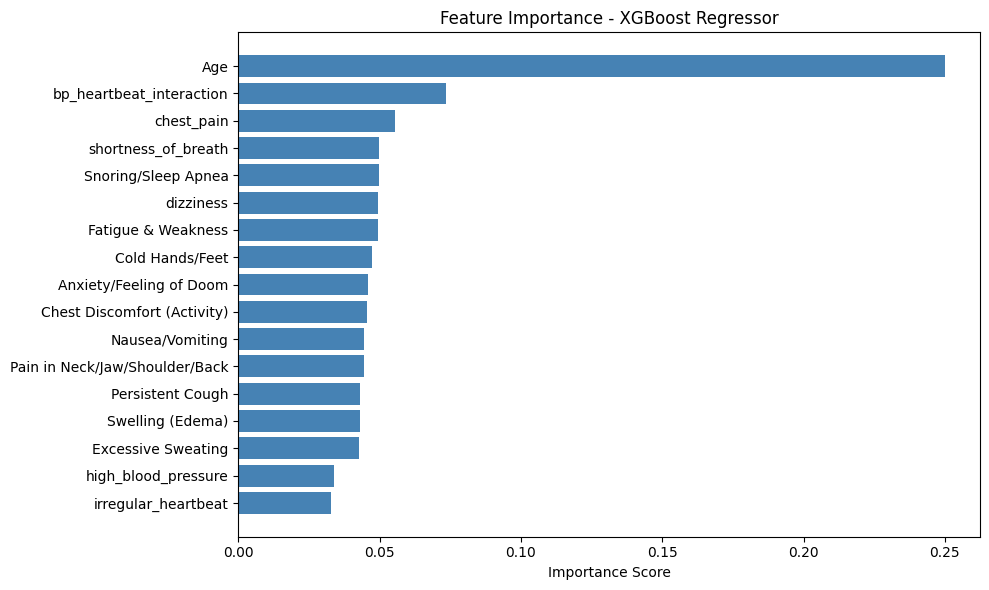

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from regressor
importances = xgb_reg.feature_importances_
feature_names = X.columns  # Use your original DataFrame's column names
sorted_idx = np.argsort(importances)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center', color='steelblue')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title("Feature Importance - XGBoost Regressor")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

c:\Books\UNI\YEAR 3 SEM 2\FYP\Text\text-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


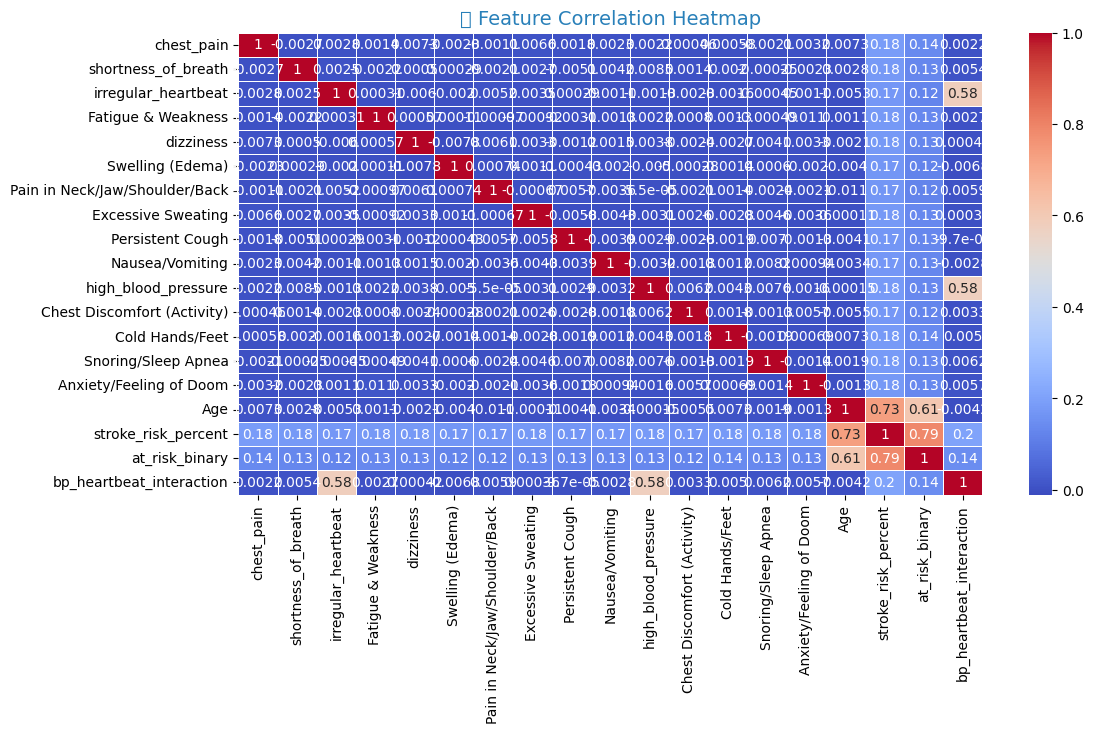

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔍 Feature Correlation Heatmap", fontsize=14, color="#2980b9")
plt.show()

## AI Transparency with SHAP

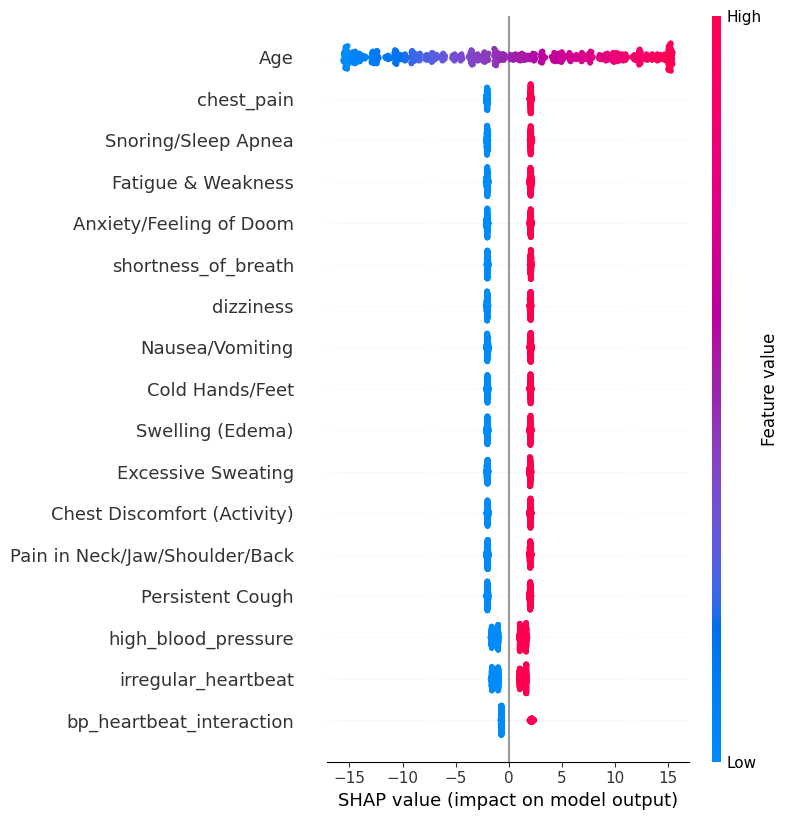

In [27]:
import shap

# Create SHAP explainer for the trained regression model
explainer = shap.Explainer(xgb_reg)  # Automatically detects TreeExplainer internally

# Select a sample of test data for explanation (adjust size if needed)
X_sample = X_test_reg[:1000]  # This should be a NumPy array or pandas DataFrame

# Compute SHAP values
shap_values = explainer(X_sample)

# Visualize feature importance summary
shap.summary_plot(shap_values, X_sample)

## Test Model

In [33]:
# Convert data to dataframe

import pandas as pd

# New patient data
data = {
    'chest_pain': [1],
    'shortness_of_breath': [1],
    'irregular_heartbeat': [1],
    'Fatigue & Weakness': [0],
    'dizziness': [0],
    'Swelling (Edema)': [1],
    'Pain in Neck/Jaw/Shoulder/Back': [0],
    'Excessive Sweating': [1],
    'Persistent Cough': [1],
    'Nausea/Vomiting': [0],
    'high_blood_pressure': [1],
    'Chest Discomfort (Activity)': [0],
    'Cold Hands/Feet': [0],
    'Snoring/Sleep Apnea': [0],
    'Anxiety/Feeling of Doom': [0],
    'Age': [50],
}

new_patient_df = pd.DataFrame(data)

# Automatically compute the derived feature
new_patient_df['bp_heartbeat_interaction'] = (
    (new_patient_df['high_blood_pressure'] == 1) & 
    (new_patient_df['irregular_heartbeat'] == 1)
).astype(int)

# Display result
print(new_patient_df)

   chest_pain  shortness_of_breath  irregular_heartbeat  Fatigue & Weakness  \
0           1                    1                    1                   0   

   dizziness  Swelling (Edema)  Pain in Neck/Jaw/Shoulder/Back  \
0          0                 1                               0   

   Excessive Sweating  Persistent Cough  Nausea/Vomiting  high_blood_pressure  \
0                   1                 1                0                    1   

   Chest Discomfort (Activity)  Cold Hands/Feet  Snoring/Sleep Apnea  \
0                            0                0                    0   

   Anxiety/Feeling of Doom  Age  bp_heartbeat_interaction  
0                        0   50                         1  


In [34]:
# Load the model
xgb_model = joblib.load('symptom_model.pkl')

In [35]:
# Assuming the new patient data is stored in 'new_patient_df'

# Standardize the 'Age' feature of the new patient
new_patient_df["Age"] = scaler.transform(new_patient_df[["Age"]])

In [36]:
# Predict stroke risk

predicted_risk = xgb_model.predict(new_patient_df)
print(f"Predicted Stroke Risk: {predicted_risk[0]:.2f}%")

Predicted Stroke Risk: 50.81%
